# dealuz-sample notebook

This notebook show some examples on how to use the functions contained in this module

The examples shown here are paraphrased from the references cited previously

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# result type
from dealuz import DEAResult

# functins
from dealuz import dea, graphical_frontier

## Examples from Bana e Costa et al. (2016)

### Ficticional example

In this example we use fictional data from the paper produced by Bana e Costa and friends on the graphical of multiple inputs x/outputs y efficiency frontier


| DMU 	| x¹ 	| x² 	| y¹ 	| y² 	|
|:-----	|---:	|---:	|---:	|---:	|
| A   	|  1 	|  4 	|  2 	|  6 	|
| B   	|  3 	|  4 	|  9 	|  5 	|
| C   	|  4 	|  2 	|  3 	|  8 	|
| D   	|  6 	|  8 	|  5 	|  3 	|
| E   	|  2 	|  1 	|  4 	|  3 	|
| F   	|  1 	|  9 	|  1 	|  1 	|


In [3]:
bana_costa1 = [
    [1, 4, 2, 6],
    [3, 4, 9, 5],
    [4, 2, 3, 8],
    [6, 8, 5, 3],
    [2, 1, 4, 3],
    [1, 9, 1, 1],
]

bana_costa1 = pd.DataFrame(
    bana_costa1,
    index=["A", "B", "C", "D", "E", "F"],
    columns=["x1", "x2", "y1", "y2"]
)

bana_costa1

,x1,x2,y1,y2
A,1,4,2,6
B,3,4,9,5
C,4,2,3,8
D,6,8,5,3
E,2,1,4,3
F,1,9,1,1


#### Constant returns to scale model (or CCR, for *Charnes, Cooper and Rhodes*)

For this activity table Bana e Costa and more people shows the input and output oriented models, to keep the same order as the paper the input oriented model is demonstrated first

Firstly we use the `dea` function to calculate efficiency indexes for these DMUs

For both examples they use constant returns to scale assumption; since this assumption (prompted in `VRS` param) is the default we'll need to declare just the other parameters

For showing the values clearly, the `reference_set` will be omitted

The efficiencies expected are (approximately for there may be rounding discreapancies caused by differences in algorithms):

| DMU 	| Efficiency Index 	|
|-----	|-----------------:	|
| A   	|           1.0000 	|
| B   	|           1.0000 	|
| C   	|           1.0000 	|
| D   	|           0.2862 	|
| E   	|           1.0000 	|
| F   	|           0.3636 	|

In [4]:
bc1_ccr_input = dea(bana_costa1, inputs_list=["x1", "x2"], outputs_list=["y1", "y2"], reference_set=False)
bc1_ccr_input.efficiencies

,INDEX
DMU,
A,1.00000
B,1.00000
C,1.00000
D,0.28623
E,1.00000
F,0.36338


For the output oriented example, the expected results are those:

| DMU 	| Efficiency Index 	|
|-----	|-----------------:	|
| A   	|           1.0000 	|
| B   	|           1.0000 	|
| C   	|           1.0000 	|
| D   	|           3.4941 	|
| E   	|           1.0000 	|
| F   	|           2.7503 	|

In [5]:
bc1_ccr_output = dea(bana_costa1, inputs_list=["x1", "x2"], outputs_list=["y1", "y2"], input_oriented=False, reference_set=False)
bc1_ccr_output.efficiencies

,INDEX
DMU,
A,1.00000
B,1.00000
C,1.00000
D,3.49367
E,1.00000
F,2.75070


Finally we go to the first demo on the papers subject: the efficiency plotting

It is important to note that the results may differ from those on the paper and this is somewhat expected as Bana e Costa and their homies point out in their paper:
>  Even though the location of efficient DMUs
may change along the 45° line, the representation of inefficient
DMUs remains always in the same location on the graph

So the inefficient DMUs shall keep the same relation with the efficiency identity line as shown in their paper

For reference the software they used on the paper production was the [SIAD software](http://tep.uff.br/wp-content/uploads/sites/154/2018/06/FreeSoftwareC2_239_Meza.pdf) that can be downloaded via [UFF's Department of Production Engineering softwares list](http://tep.uff.br/softwares/) but only works on Windows apparently

I use linux btw

For reference, the expected result is this (image took from their paper):
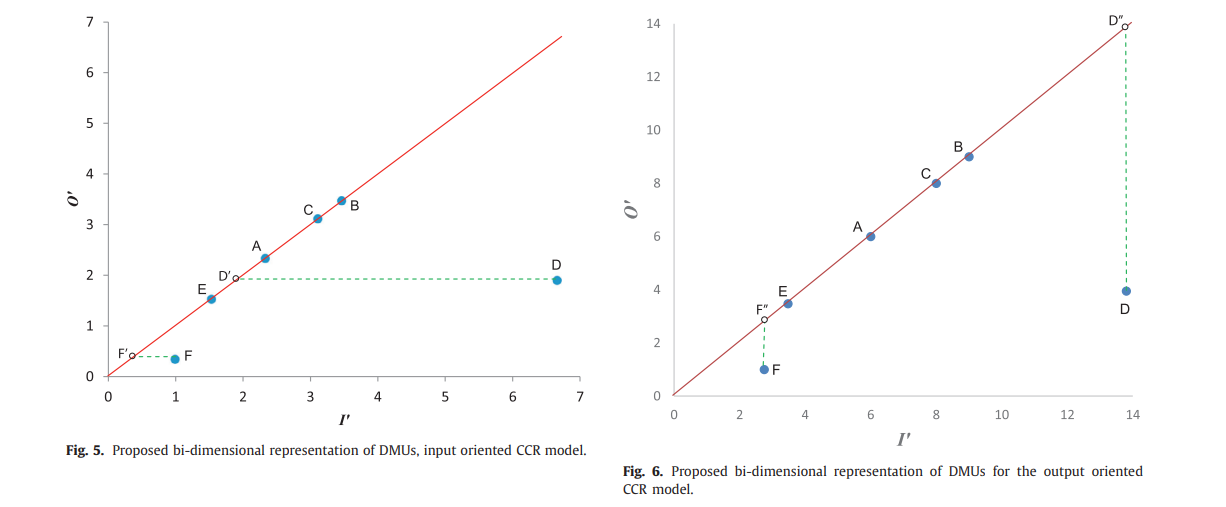

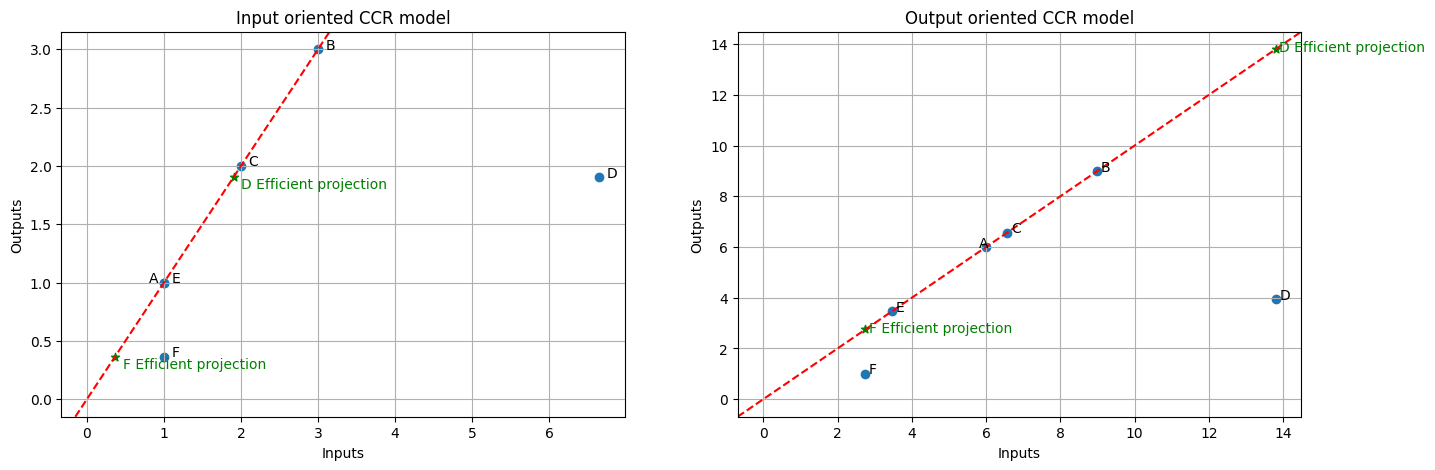

In [10]:
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1).set_title("Input oriented CCR model")

# Calculating graphical data and efficiency line
bc1_ccr_input_plot = graphical_frontier(bana_costa1, dea_weights=bc1_ccr_input.weights, inputs_list=["x1", "x2"], outputs_list=["y1", "y2"])
plt.axline(xy1=(0, 0), slope=1, color="red", linestyle="--")
plt.ylabel("Outputs")
plt.xlabel("Inputs")

# DMU placement in graph
plt.scatter(data=bc1_ccr_input_plot, x="INPUT", y="OUTPUT")
for i in bc1_ccr_input_plot.index:
    text_x, text_y = bc1_ccr_input_plot.loc[i, :]
    plt.text(text_x + .1 if i != "A" else text_x - .2, text_y, i)

# Inefficient DMU projection onto efficiency line
# Since the objective of this example is to minimise inputs
# the inefficient DMUs efficiency projection is achieved by
# decreasing their inputs levels to keep up with identity
# property of the efficiency line; thus their projections
# are given by (OUTPUT, OUTPUT) coordinates
plt.scatter(data=bc1_ccr_input_plot[bc1_ccr_input.efficiencies["INDEX"] < 1], x="OUTPUT", y="OUTPUT", marker="*", color="green")
for i in bc1_ccr_input_plot[bc1_ccr_input.efficiencies["INDEX"] < 1].index:
    text_y = bc1_ccr_input_plot.loc[i, "OUTPUT"]
    plt.text(text_y + .1, text_y - .1, f"{i} Efficient projection", color="green")

plt.grid()


plt.subplot(1, 2, 2).set_title("Output oriented CCR model")

bc1_ccr_output_plot = graphical_frontier(bana_costa1, dea_weights=bc1_ccr_output.weights, inputs_list=["x1", "x2"], outputs_list=["y1", "y2"], input_oriented=False)
plt.axline(xy1=(0, 0), slope=1, color="red", linestyle="--")
plt.ylabel("Outputs")
plt.xlabel("Inputs")

plt.scatter(data=bc1_ccr_output_plot, x="INPUT", y="OUTPUT")
for i in bc1_ccr_output_plot.index:
    text_x, text_y = bc1_ccr_output_plot.loc[i, :]
    plt.text(text_x + .1 if i != "A" else text_x - .2, text_y, i)

plt.scatter(data=bc1_ccr_output_plot[bc1_ccr_output.efficiencies["INDEX"] > 1], x="INPUT", y="INPUT", marker="*", color="green")
for i in bc1_ccr_output_plot[bc1_ccr_output.efficiencies["INDEX"] > 1].index:
    text_y = bc1_ccr_output_plot.loc[i, "INPUT"]
    plt.text(text_y + .1, text_y - .1, f"{i} Efficient projection", color="green")

plt.grid()

#### Variable returns to scale model (or BCC, for *Banker, Charnes and Cooper*)

Bana e Costa and all the other brillant brazillian minds also demonstrates the fictional example with a model with variable returns to scale

For the input oriented model, the efficiencies expected are:

| DMU 	| Efficiency Index 	|
|-----	|-----------------:	|
| A   	|           1.0000 	|
| B   	|           1.0000 	|
| C   	|           1.0000 	|
| D   	|           0.3400 	|
| E   	|           1.0000 	|
| F   	|           1.0000 	|

In [7]:
bc1_bcc_input = dea(bana_costa1, inputs_list=["x1", "x2"], outputs_list=["y1", "y2"], VRS=True, reference_set=False)
bc1_bcc_input.efficiencies

,INDEX
DMU,
A,1.00000
B,1.00000
C,1.00000
D,0.33986
E,1.00000
F,0.99890


For the output oriented example, the expected results are those:

| DMU 	| Efficiency Index 	|
|-----	|-----------------:	|
| A   	|           1.0000 	|
| B   	|           1.0000 	|
| C   	|           1.0000 	|
| D   	|           0.5789*	|
| E   	|           1.0000 	|
| F   	|           0.5000*	|

Is worth noting that the index of inefficient DMUs in Bana e Costa plus their sancts paper is lesser than 1

This is not usual when dealing with output oriented models, but this is fine as this means their efficiency indexes underwent a simple yet useful transformation where $efficiency' = efficiency^{-1} = \frac{1}{efficiency}$

This package does not apply any index transformations, we believe you should do the trick. So the expected results from `dea` function for those inefficient DMUs should be:

| DMU 	| Efficiency Index 	|
|-----	|-----------------:	|
| D   	|           1.7274	|
| F   	|           2.0000	|

In [8]:
bc1_bcc_output = dea(bana_costa1, inputs_list=["x1", "x2"], outputs_list=["y1", "y2"], VRS=True, input_oriented=False, reference_set=False)
bc1_bcc_output.efficiencies

,INDEX
DMU,
A,1.00000
B,1.00000
C,1.00000
D,1.72798
E,1.00000
F,2.75075




For the input oriented BCC model, the graphic representation should be:
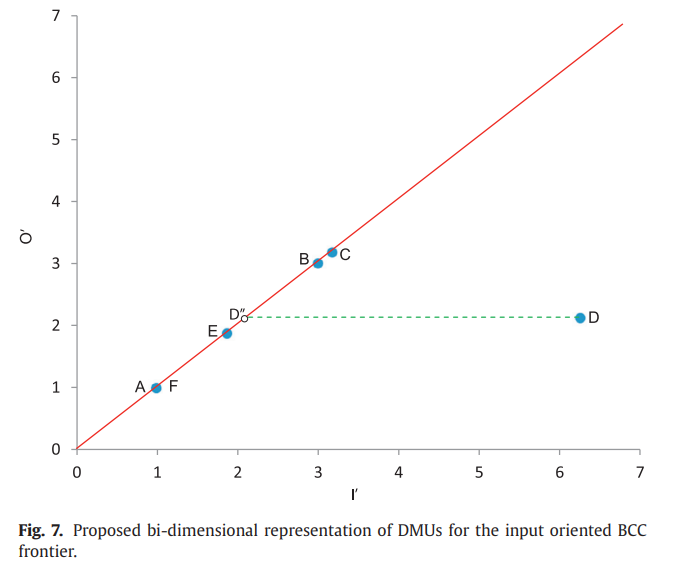

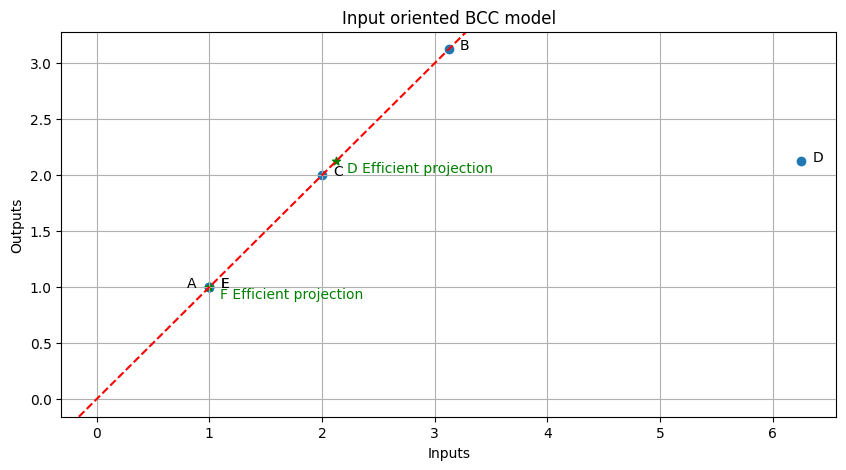

In [9]:
plt.figure(figsize=(10, 5))
plt.title("Input oriented BCC model")

bc1_bcc_input_plot = graphical_frontier(bana_costa1, dea_weights=bc1_bcc_input.weights, inputs_list=["x1", "x2"], outputs_list=["y1", "y2"], VRS=True)
plt.axline(xy1=(0, 0), slope=1, color="red", linestyle="--")
plt.ylabel("Outputs")
plt.xlabel("Inputs")

plt.scatter(data=bc1_bcc_input_plot, x="INPUT", y="OUTPUT")
for i in bc1_bcc_input_plot.index:
    text_x, text_y = bc1_bcc_input_plot.loc[i, :]
    plt.text(text_x + .1 if i != "A" else text_x - .2, text_y, i)

plt.scatter(data=bc1_bcc_input_plot[bc1_bcc_input.efficiencies["INDEX"] < 1], x="OUTPUT", y="OUTPUT", marker="*", color="green")
for i in bc1_bcc_input_plot[bc1_bcc_input.efficiencies["INDEX"] < 1].index:
    text_y = bc1_bcc_input_plot.loc[i, "OUTPUT"]
    plt.text(text_y + .1, text_y - .1, f"{i} Efficient projection", color="green")

plt.grid()

For the output oriented BCC model, the graphic representation should be:
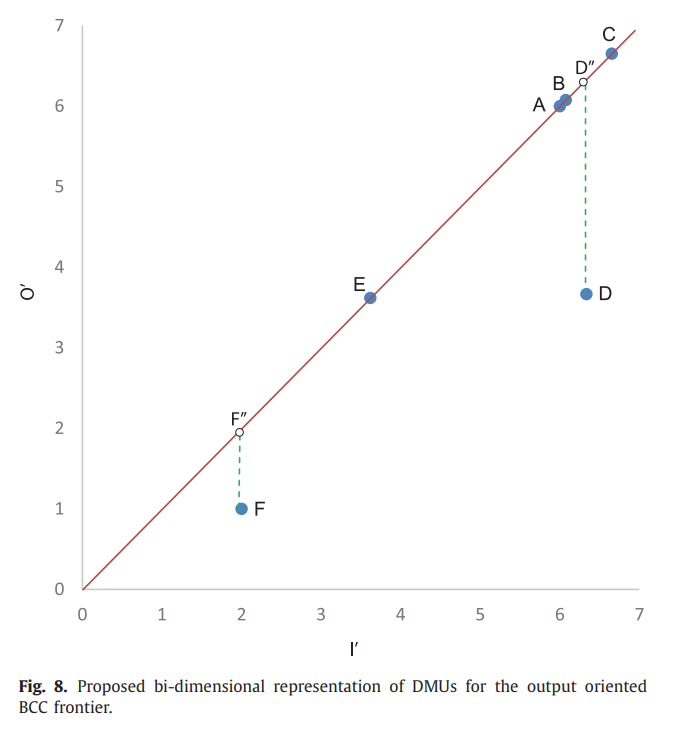

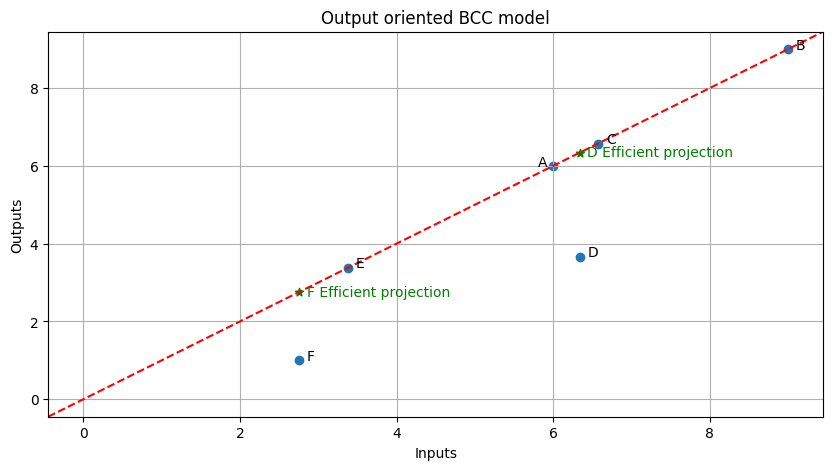

In [11]:
plt.figure(figsize=(10, 5))
plt.title("Output oriented BCC model")

bc1_bcc_output_plot = graphical_frontier(bana_costa1, dea_weights=bc1_bcc_output.weights, inputs_list=["x1", "x2"], outputs_list=["y1", "y2"], VRS=True, input_oriented=False)
plt.axline(xy1=(0, 0), slope=1, color="red", linestyle="--")
plt.ylabel("Outputs")
plt.xlabel("Inputs")

plt.scatter(data=bc1_bcc_output_plot, x="INPUT", y="OUTPUT")
for i in bc1_bcc_output_plot.index:
    text_x, text_y = bc1_bcc_output_plot.loc[i, :]
    plt.text(text_x + .1 if i != "A" else text_x - .2, text_y, i)

plt.scatter(data=bc1_bcc_output_plot[bc1_bcc_output.efficiencies["INDEX"] > 1], x="INPUT", y="INPUT", marker="*", color="green")
for i in bc1_bcc_output_plot[bc1_bcc_output.efficiencies["INDEX"] > 1].index:
    text_y = bc1_bcc_output_plot.loc[i, "INPUT"]
    plt.text(text_y + .1, text_y - .1, f"{i} Efficient projection", color="green")

plt.grid()